In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, cross_val_score
from xgboost import XGBClassifier

# Load data
Matrix_Data = pd.read_csv("D:\Model-Matrix_Update_MissingValues.csv")

# Define features and target
X = Matrix_Data[['sumWeeklyHealthHours',
    'SumPopulation',
    'SumPopulation_CompletedFromExternalData',
    'NumberOfCities_smaller35km',
    'Jewish_precent',
    'Arab_precent',
    'Jewish_Arabs_precent_CompletedFromExternalData',
    'precentPopulation_over20',
    'ClalitPrecent_fromTatal',
    'ClalitPrecent_fromTatal_CompletedFromExternalData',
    'MacabiPrecent_fromTatal',
    'MacabiPrecent_fromTatal_CompletedFromExternalData',
    'MeuhedetPrecent_fromTatal',
    'MeuhedetPrecent_fromTatal_CompletedFromExternalData',
    'LeumitPrecent_fromTatal',
    'LeumitPrecent_fromTatal_CompletedFromExternalData',
    'SocioeconomicStatusֹ',
    'SocioeconomicStatusֹ_CompletedFromExternalData',
    'periphery',
    'Jerusalem_district',
    'North_district',
    'Center_district',
    'Haifa_district',
    'TLV_district',
    'South_district'
]]
y = Matrix_Data['Clinic_hours_for_1000_people_bigger9']


from sklearn.model_selection import train_test_split

# Step 1: Split data into 80% training + validation and 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split the 80% training + validation into 75% train and 25% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [2]:
from sklearn.model_selection import GridSearchCV

# Define the number of folds for cross-validation
num_folds = 5

# Define hyperparameters
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 3]
}

# Initialize the model (XGBoost)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=num_folds, scoring='roc_auc', verbose=1, n_jobs=-1)

# Fit the grid search to the training set
grid_search.fit(X_train, y_train)

# Print all parameter combinations and their scores
print("All parameter combinations and their scores:")
for i in range(len(grid_search.cv_results_['params'])):
    print(f"Params: {grid_search.cv_results_['params'][i]}")
    print(f"Mean Test Score: {grid_search.cv_results_['mean_test_score'][i]}")
    print(f"Std Test Score: {grid_search.cv_results_['std_test_score'][i]}")
    print("")

# Extract and print the best parameters
best_params = grid_search.best_params_
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param} = {value}")

# Extract and print the best score
best_score = grid_search.best_score_
print(f"\nBest ROC AUC Score: {best_score}")

# Get the best model from grid search
best_model = grid_search.best_estimator_



Fitting 5 folds for each of 144 candidates, totalling 720 fits
All parameter combinations and their scores:
Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
Mean Test Score: 0.9109333333333332
Std Test Score: 0.0774821556517657

Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
Mean Test Score: 0.9170666666666666
Std Test Score: 0.07808553714428242

Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
Mean Test Score: 0.9128000000000001
Std Test Score: 0.08253581040978514

Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Mean Test Score: 0.9184000000000001
Std Test Score: 0.08227174484596762

Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max

In [3]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score

In [4]:
val_preds = best_model.predict(X_val)
accuracy = accuracy_score(y_val, val_preds)
roc_auc = roc_auc_score(y_val, val_preds)
cm = confusion_matrix(y_val, val_preds)
precision = precision_score(y_val, val_preds)
recall = recall_score(y_val, val_preds)

print("\nValidation Set Evaluation:")
print("Accuracy:", accuracy)
print("ROC-AUC Score:", roc_auc)
print("Confusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)


Validation Set Evaluation:
Accuracy: 0.8627450980392157
ROC-AUC Score: 0.5611111111111111
Confusion Matrix:
 [[43  2]
 [ 5  1]]
Precision: 0.3333333333333333
Recall: 0.16666666666666666


In [5]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

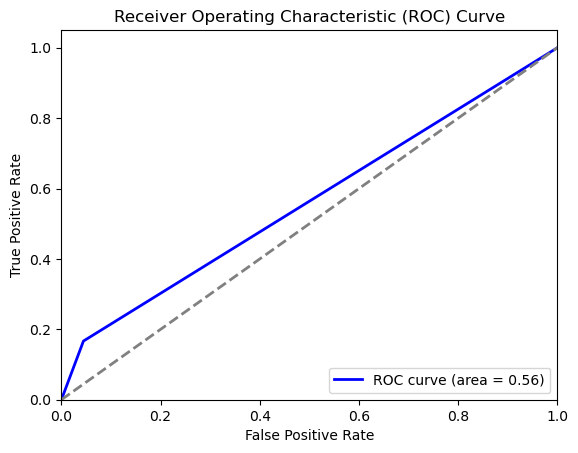

In [6]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_val, val_preds)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



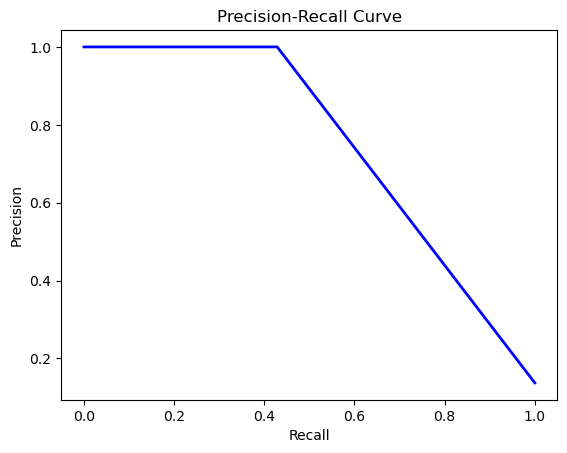

In [8]:
# Plot Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_val, val_preds)
plt.figure()
plt.plot(recall_vals, precision_vals, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
